# Figures 3

Generate figures for simulation of gradient metrics on dropout netoworks with different activations

## Setup

In [3]:
from __future__ import print_function
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# Output figure directory
figure_dir = "../writeup/figures"
results_dir = "../results"

## gradient metrics on linear dropout netoworks (simulation)

In [5]:
import csv
import numpy as np

layer = 200; num_dp = 5; xis = np.linspace(1, layer, layer )
q_aa_sli = np.zeros((num_dp,layer)); q_ab_sli = np.zeros((num_dp,layer))

i1 = 0;  i2 = 0; 
for dp in range(6,11):
    j1 = 0; j2 = 0;
    with open('../data/gradient_lis/linear_r%saa_s.csv' %dp , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_aa_sli[i1,j1] = row[0]; j1= j1+1

    with open('../data/gradient_lis/linear_r%sab_sab.csv' %dp  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_ab_sli[i2,j2] = row[0]; j2 = j2+1   
    i1= i1+1;   i2= i2+1       

## $g_{aa}^l = g_{aa}^{l+1} \chi_1$ on linear dropout networks (theory)

In [7]:
xis1 = np.linspace(1, layer,  layer)
sigmaw2 = 0.5; sigmab2 = 0.1
chi1 = np.zeros((num_dp,layer))
i = 0
chi1[0,0] = 4e-18
chi1[1,0] = 4e-32
chi1[2,0] = 4e-44
chi1[3,0] = 4e-60
chi1[4,0] = 4e-54
for dp in range(6,11):
    rho = dp*0.1
    #chi1[i,0] = 1e-17
    for l in range(1,layer):
        chi1[i,l] =  rho/sigmaw2*chi1[i,l-1]
    i = i+1      

## gradient metrics on ReLU dropout netoworks (simulation)

In [9]:
import csv
import numpy as np

layer = 200; num_dp = 5; xis = np.linspace(1, layer, layer )
q_aa_sre = np.zeros((num_dp,layer)); q_ab_sre = np.zeros((num_dp,layer))

i1 = 0;  i2 = 0; 
for dp in range(6,11):
    j1 = 0; j2 = 0;
    with open('../data/gradient_lis/relu_r%saa_s.csv' %dp , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_aa_sre[i1,j1] = row[0]; j1= j1+1

    with open('../data/gradient_lis/relu_r%sab_sab.csv' %dp  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_ab_sre[i2,j2] = row[0]; j2 = j2+1   
    i1= i1+1;   i2= i2+1   

## $g_{aa}^l = g_{aa}^{l+1} \chi_1$ on ReLU dropout networks (theory)

In [11]:
from network.theory import q_fixed_point, compute_chi1

weight_sigma2 = 1.0;  bias_sigma2 = 0.1

gue_re = np.zeros((num_dp,layer))
i = 0
gue_re[0,0] = 4e-19; gue_re[1,0] = 4e-33; gue_re[2,0] = 1e-44
gue_re[3,0] = 4e-55; gue_re[4,0] = 4e-64;
for dp in range(6,11):
    rho = dp*0.1
    t,qstar  =  q_fixed_point(weight_sigma2**0.5, bias_sigma2**0.5, 'relu', rho)
    chi1_re = compute_chi1(qstar, weight_sigma2**0.5, bias_sigma2**0.5, rho, 'd_relu')
    for l in range(1,layer):
        gue_re[i,l] =  1.0/chi1_re*gue_re[i,l-1]
    i = i+1      

## gradient metrics on tanh dropout netoworks (simulation)

In [13]:
import csv
import numpy as np

layer = 200; num_dp = 5; xis = np.linspace(1, layer, layer )
q_aa_sta = np.zeros((num_dp,layer)); q_ab_sta = np.zeros((num_dp,layer))

i1 = 0;  i2 = 0; 
for dp in range(6,11):
    j1 = 0; j2 = 0;
    with open('../data/gradient_lis/tanh_r%saa_s.csv' %dp , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_aa_sta[i1,j1] = row[0]; j1= j1+1

    with open('../data/gradient_lis/tanh_r%sab_sab.csv' %dp  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_ab_sta[i2,j2] = row[0]; j2 = j2+1   
    i1= i1+1;   i2= i2+1  

## $g_{aa}^l = g_{aa}^{l+1} \chi_1$ on tanh dropout networks (theory)

In [14]:
from network.theory import q_fixed_point, compute_chi1

weight_sigma2 = 1.4;  bias_sigma2 = 0.1

gue_ta = np.zeros((num_dp,layer))
i = 0
gue_ta[0,0] = 1e3; gue_ta[1,0] = 2e-3; gue_ta[2,0] = 1e-8
gue_ta[3,0] = 1e-13; gue_ta[4,0] = 2e-18;
for dp in range(6,11):
    rho = dp*0.1
    t,qstar  =  q_fixed_point(weight_sigma2**0.5, bias_sigma2**0.5, 'tanh', rho)
    chi1_ta = compute_chi1(qstar, weight_sigma2**0.5, bias_sigma2**0.5, rho, 'd_tanh')
    for l in range(1,layer):
        gue_ta[i,l] =  1.0/chi1_ta*gue_ta[i,l-1]
    i = i+1  

## gradient metrics on hard tanh dropout netoworks (simulation)

In [15]:
import csv
import numpy as np

layer = 200; num_dp = 5; xis = np.linspace(1, layer, layer )
q_aa_sht = np.zeros((num_dp,layer)); q_ab_sht = np.zeros((num_dp,layer))
q_aa_sht1 = np.zeros((num_dp,layer)); q_ab_sht1 = np.zeros((num_dp,layer))

i1 = 0;  i2 = 0; 
for dp in range(6,11):
    j1 = 0; j2 = 0;
    with open('../data/gradient_lis/htanh_r%saa_s.csv' %dp , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_aa_sht[i1,j1] = row[0]; j1= j1+1

    with open('../data/gradient_lis/htanh_r%sab_sab.csv' %dp  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_ab_sht[i2,j2] = row[0]; j2 = j2+1   
    i1= i1+1;   i2= i2+1  


## $g_{aa}^l = g_{aa}^{l+1} \chi_1$ on hard tanh dropout networks (theory)

In [17]:
from network.theory import q_fixed_point, compute_chi1

weight_sigma2 = 1.4;  bias_sigma2 = 0.1

gue_ht = np.zeros((num_dp,layer))
i = 0
gue_ht[0,0] = 3e25; gue_ht[1,0] = 5e18; gue_ht[2,0] = 4e12
gue_ht[3,0] = 1e7; gue_ht[4,0] = 1e2;
for dp in range(6,11):
    rho = dp*0.1
    t,qstar  =  q_fixed_point(weight_sigma2**0.5, bias_sigma2**0.5, 'hard_tanh', rho)
    chi1_ht = compute_chi1(qstar, weight_sigma2**0.5, bias_sigma2**0.5, rho, 'd_hard_tanh')
    for l in range(1,layer):
        gue_ht[i,l] =  1.0/chi1_ht*gue_ht[i,l-1]
    i = i+1  

# Figure 3:  The metrics of gradient with one and two different inputs
$g^l_{aa}$ (solid lines), $\tilde{g}^l_{ab}$ (dashed lines), and $g^l \propto \chi_1^{L-l}$ (dotted lines) as a function of layer $l$ with different activation. (a) ReLU network with $\sigma^2_w =1.0$ and $\sigma^2_b = 0.1$. (b) Tanh network with $\sigma^2_w =1.4$ and $\sigma^2_b = 0.1$. (c) Hard Tanh network with $\sigma^2_w =1.4$ and $\sigma^2_b = 0.1$.  Excellent agreement is observed between empirical simulations of $g^l_{aa}$, $\tilde{g}^l_{ab}$, and formula $g^l = g^{l+1} \chi_1 $.

Text(0.5,1,'Hard Tanh')

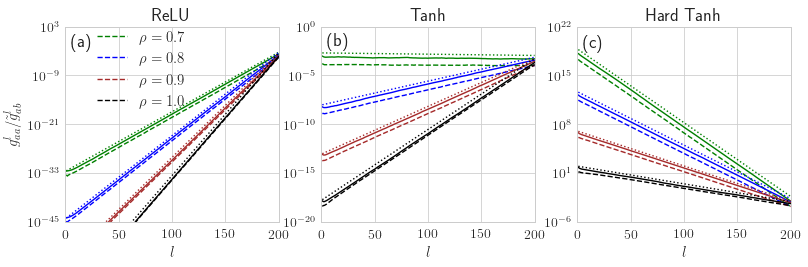

In [22]:
plt.figure(figsize=(13, 3.6))
gs = plt.GridSpec(1, 3)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

a1 = plt.subplot(gs[0, 0])

plt.semilogy(xis1, q_aa_sre[1],color='green'); plt.semilogy(xis1, q_ab_sre[1],'--',color='green',label=r'$\rho = 0.7$')
plt.semilogy(xis1, q_aa_sre[2],color='blue'); plt.semilogy(xis1, q_ab_sre[2],'--',color='blue',label=r'$\rho = 0.8$')
plt.semilogy(xis1, q_aa_sre[3],color='brown'); plt.semilogy(xis1, q_ab_sre[3],'--',color='brown',label=r'$\rho = 0.9$')
plt.semilogy(xis1, q_aa_sre[4],color='black'); plt.semilogy(xis1, q_ab_sre[4],'--',color='black',label=r'$\rho = 1.0$')
plt.semilogy(xis1, gue_re[1],ls=':',color='green'); plt.semilogy(xis1, gue_re[2],ls=':',color='blue');
plt.semilogy(xis1, gue_re[3],ls=':',color='brown'); plt.semilogy(xis1, gue_re[4],ls=':',color='black');

plt.xlim(0, 200);    plt.xticks([0, 50, 100, 150, 200])
plt.ylim(1e-45, 1000);  plt.yticks([1e-45,1e-33, 1e-21, 1e-9, 1e3]);
plt.annotate('(a)', xy=(0, 0.1), xytext=(5.5, 0.01),  fontsize=18)
plt.xlabel('$l$', fontsize=15); plt.ylabel(r'$g_{aa}^{l}/\tilde{g}_{ab}^{l}$', fontsize=15)
plt.title('ReLU', fontsize=18)
plt.legend(loc=(0.12,0.55),fontsize=15)

a2 = plt.subplot(gs[0, 1])

plt.semilogy(xis1, q_aa_sta[1],color='green'); plt.semilogy(xis1, q_ab_sta[1],'--',color='green')
plt.semilogy(xis1, q_aa_sta[2],color='blue'); plt.semilogy(xis1, q_ab_sta[2],'--',color='blue')
plt.semilogy(xis1, q_aa_sta[3],color='brown'); plt.semilogy(xis1, q_ab_sta[3],'--',color='brown')
plt.semilogy(xis1, q_aa_sta[4],color='black'); plt.semilogy(xis1, q_ab_sta[4],'--',color='black')

plt.semilogy(xis1, gue_ta[1],ls=':',color='green'); plt.semilogy(xis1, gue_ta[2],ls=':',color='blue');
plt.semilogy(xis1, gue_ta[3],ls=':',color='brown'); plt.semilogy(xis1, gue_ta[4],ls=':',color='black');
plt.xlim(0, 200);    plt.xticks([0, 50, 100, 150, 200])
plt.ylim(1e-20, 1e-0);  plt.yticks([1e-20,1e-15, 1e-10, 1e-5, 1e0]);
plt.annotate('(b)', xy=(0, 1e0), xytext=(5.5, 0.01),  fontsize=18)
plt.xlabel('$l$', fontsize=15); plt.title('Tanh', fontsize=18)


a3 = plt.subplot(gs[0, 2])

plt.semilogy(xis1, q_aa_sht[1],color='green');  plt.semilogy(xis1, q_ab_sht[1],'--',color='green')
plt.semilogy(xis1, q_aa_sht[2],color='blue');   plt.semilogy(xis1, q_ab_sht[2],'--',color='blue')
plt.semilogy(xis1, q_aa_sht[3],color='brown');     plt.semilogy(xis1, q_ab_sht[3],'--',color='brown')
plt.semilogy(xis1, q_aa_sht[4],color='black');  plt.semilogy(xis1, q_ab_sht[4],'--',color='black')

plt.semilogy(xis1, gue_ht[1],ls=':',color='green'); plt.semilogy(xis1, gue_ht[2],ls=':',color='blue');
plt.semilogy(xis1, gue_ht[3],ls=':',color='brown'); plt.semilogy(xis1, gue_ht[4],ls=':',color='black');
plt.xlim(0, 200); plt.xticks([0, 50, 100, 150, 200]);
plt.ylim(1e-6, 1e22); plt.yticks([1e-6, 1e1, 1e8, 1e15, 1e22]);
plt.xlabel('$l$', fontsize=15);
plt.annotate('(c)', xy=(0, 1e21), xytext=(5.5, 1e19),  fontsize=18)
plt.title('Hard Tanh', fontsize=18)

#savefig(os.path.join(figure_dir, "fig3_gradsim.pdf" ), bbox_inches='tight')
